In [1]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import math
from datetime import datetime
from matplotlib.ticker import ScalarFormatter
from IPython.display import display
import statistics
from matplotlib.axis import Axis
from scipy.optimize import curve_fit

C:\Users\franc\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\franc\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\franc\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\franc\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
freq_list = [425.0 , 525.0 , 625.0 ,  675.0 , 775.0 , 875.0 , 975.0 , 1025.0 , 1225.0 , 1375.0 , 1475.0 , 
             1725.0 , 1825.0 , 2075.0 , 2425.0 , 2675.0 , 3325.0 , 3925.0 , 4525.0 , 5225.0 , 5825.0 , 
             6525.0 , 7625.0 , 8225.0 , 10125.0]
num = len(freq_list)

In [3]:
_, _, files_9_10 = next(os.walk("RPW_Ratio_Arrays\\9_10"))
file_count_9_10 = len(files_9_10)

data_list_9_10 = [] # empty list

for i in range(0,file_count_9_10):
    data_list_9_10.append(np.loadtxt('RPW_Ratio_Arrays\\9_10' + '\\' + files_9_10[i] , dtype=float))
    
avg_9_10 = np.average(data_list_9_10, axis = 0)
err_9_10 = np.std(data_list_9_10, axis = 0)

In [4]:
_, _, files_9_11 = next(os.walk("RPW_Ratio_Arrays\\9_11"))
file_count_9_11 = len(files_9_11)

data_list_9_11 = [] # empty list

for i in range(0,file_count_9_11):
    data_list_9_11.append(np.loadtxt('RPW_Ratio_Arrays\\9_11' + '\\' + files_9_11[i] , dtype=float))
    
avg_9_11 = np.average(data_list_9_11, axis = 0)
err_9_11 = np.std(data_list_9_11, axis = 0)

In [5]:
_, _, files_10_11 = next(os.walk("RPW_Ratio_Arrays\\10_11"))
file_count_10_11 = len(files_10_11)

data_list_10_11 = [] # empty list

for i in range(0,file_count_10_11):
    data_list_10_11.append(np.loadtxt('RPW_Ratio_Arrays\\10_11' + '\\' + files_10_11[i] , dtype=float))

avg_10_11 = np.average(data_list_10_11, axis = 0)
err_10_11 = np.std(data_list_10_11, axis = 0)

In [6]:
j = 13
print(files_9_10[j], data_list_9_10[j])
print(files_9_11[j], data_list_9_11[j])
print(files_10_11[j], data_list_10_11[j])

peak_9_10_2022-04-17_07_08.txt [1.763 1.731 1.673 1.692 1.838 1.645 1.83  1.768 1.727 1.684 1.782 1.847
 1.729 1.839 1.679 1.73  1.518 1.585 1.566 1.732 1.989 6.079 6.026 1.235
 2.515]
peak_9_11_2022-04-17_07_08.txt [1.002 0.965 0.925 0.913 0.89  0.903 0.956 0.888 0.903 0.953 0.972 1.016
 0.921 1.017 0.967 0.981 0.926 0.969 0.939 0.992 0.977 0.986 0.99  1.141
 1.124]
peak_10_11_2022-04-17_07_08.txt [0.573 0.564 0.56  0.546 0.5   0.552 0.525 0.504 0.535 0.576 0.548 0.556
 0.534 0.588 0.578 0.6   0.612 0.654 0.679 0.587 0.488 0.169 0.213 8.019
 0.539]


In [7]:
def f(x, A, B):
    F =  A*x + B
    return F

point_num = len(freq_list) - 10
sigma = np.ones(len(freq_list[0:point_num+1]))
sigma[-1] = 0.01

def fitting(x, y):
    x = np.array(x)
    y = np.array(y)
    parameters, covariance = curve_fit(f, x, y, sigma=sigma, maxfev=200000)
    fit_A = parameters[0]
    fit_B = parameters[1]
    return [fit_A, fit_B, f(x, fit_A, fit_B), np.sqrt(np.diag(covariance))]

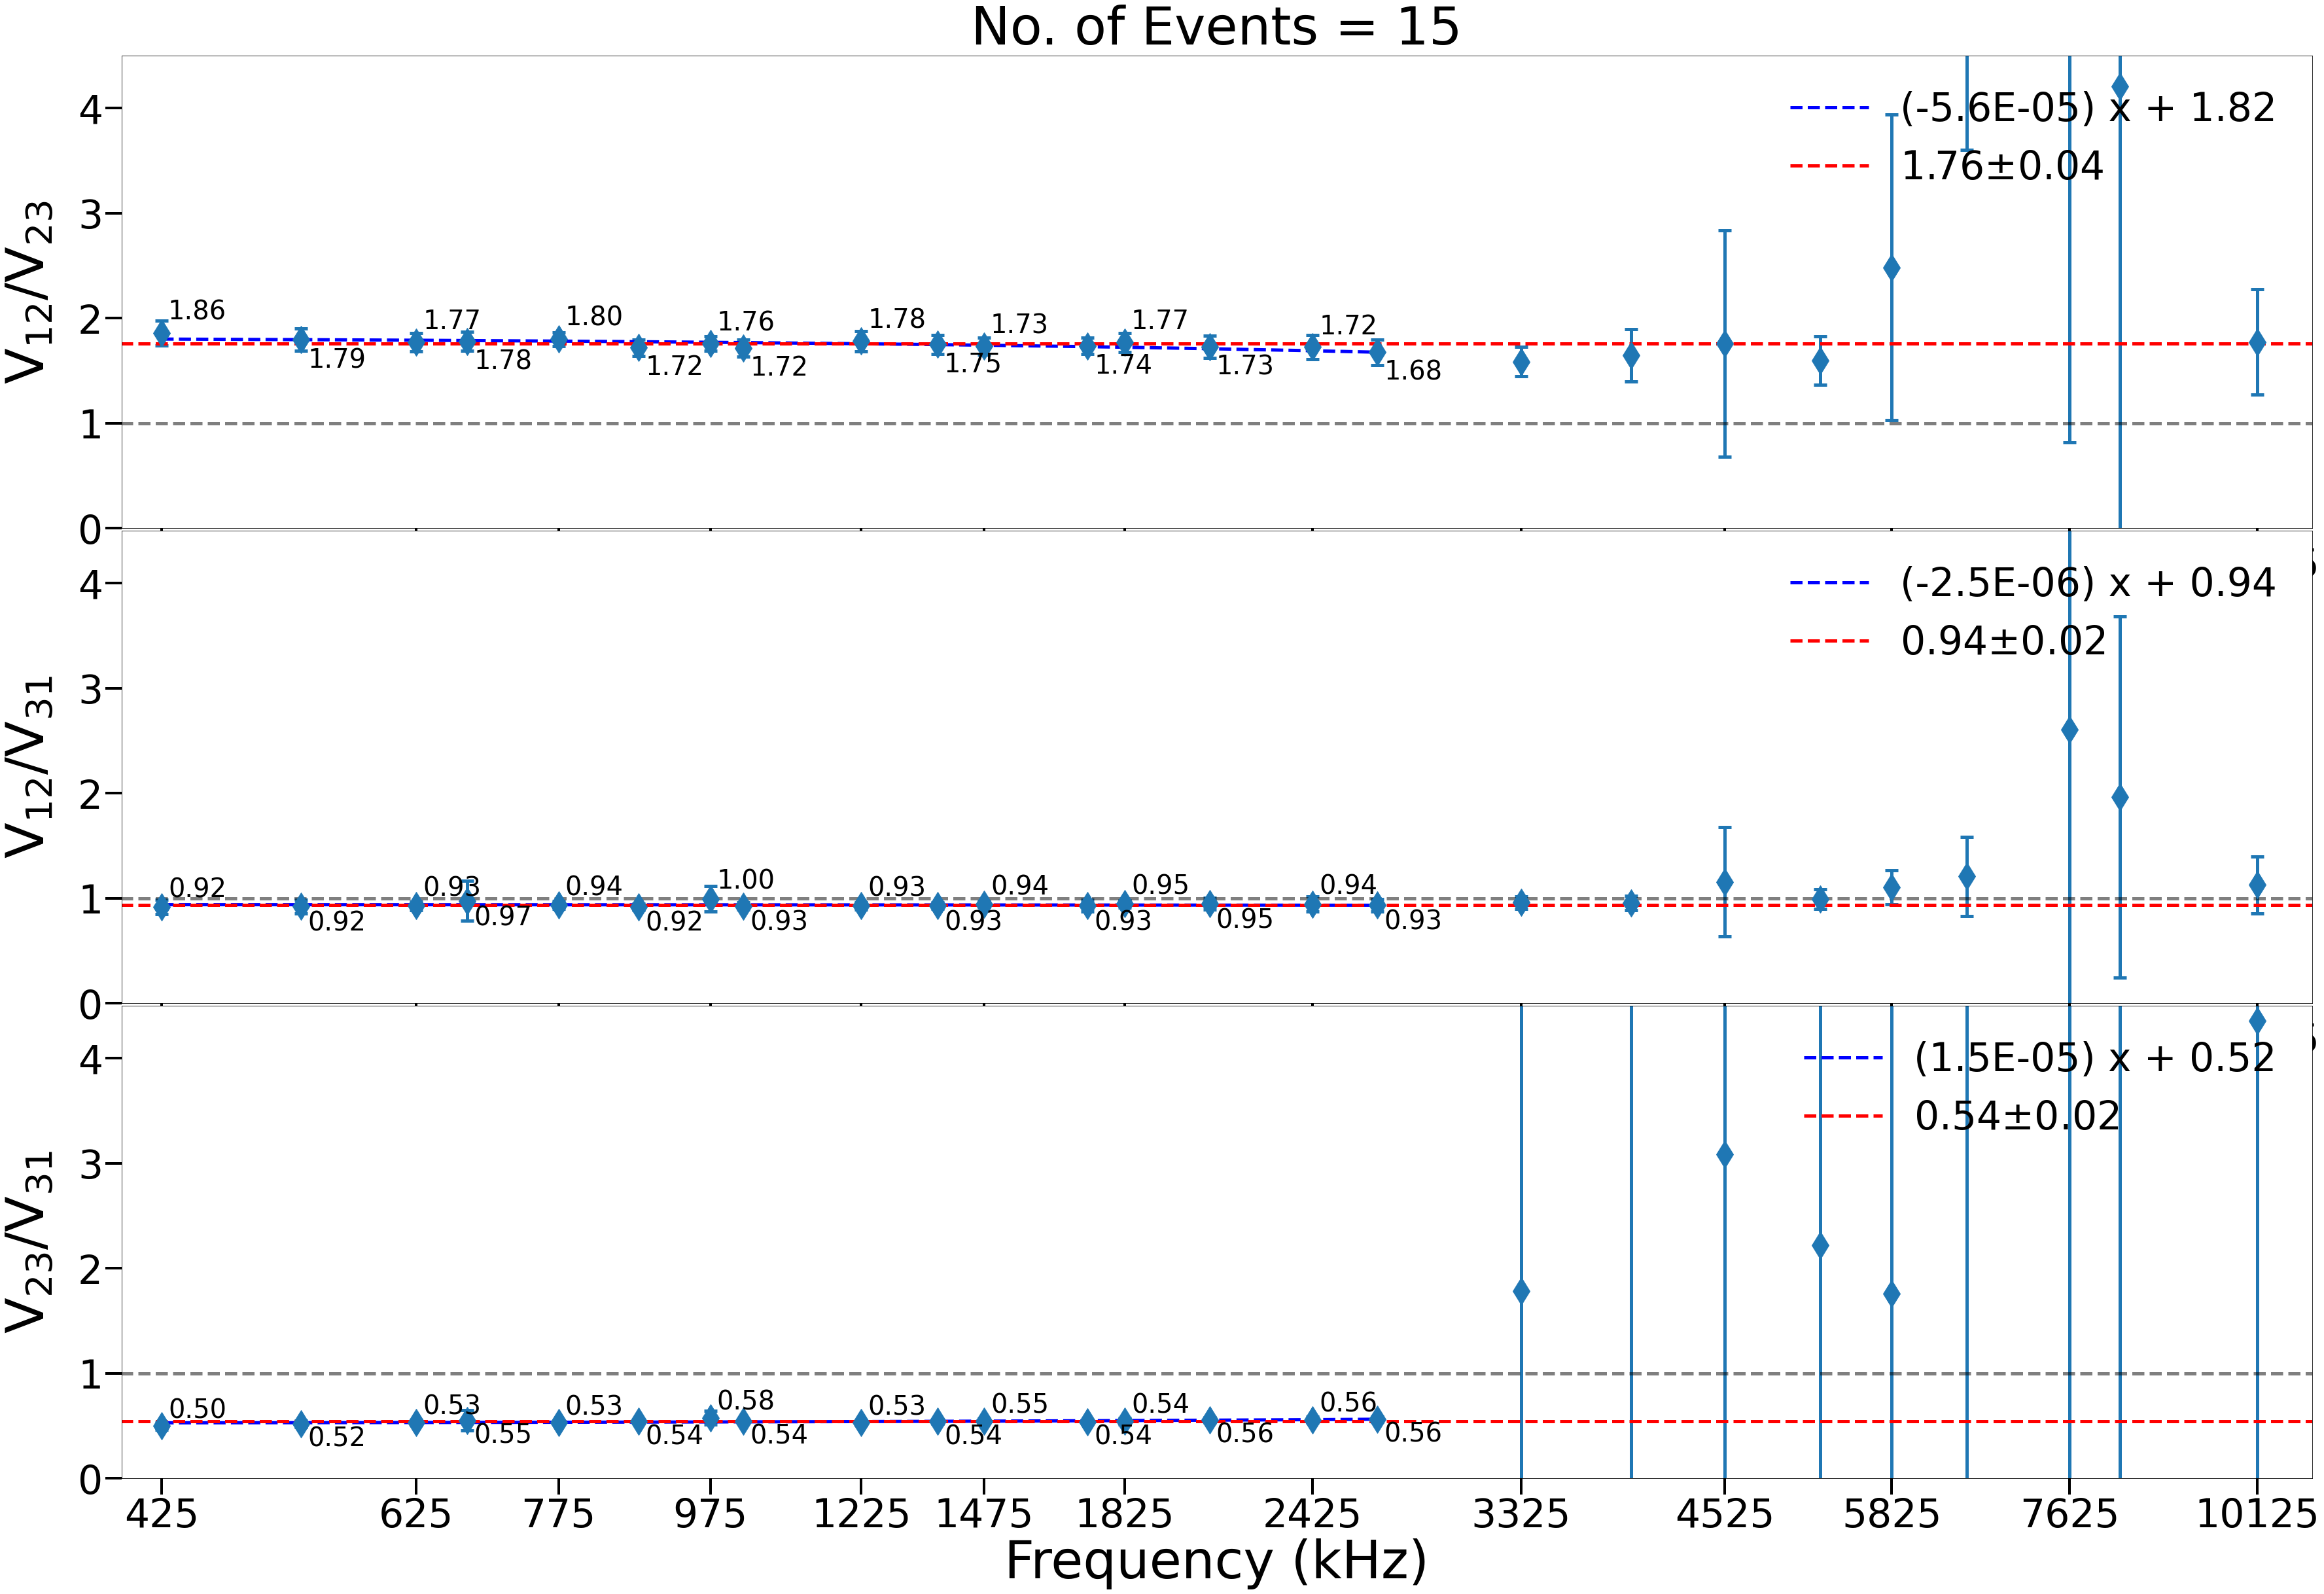

In [8]:
# Plot the ratio at the peak as a function of frequency
labl_avg_9_10 = str('%.2f' % np.average(avg_9_10[0:point_num]))
labl_avg_9_11 = str('%.2f' % np.average(avg_9_11[0:point_num]))
labl_avg_10_11 = str('%.2f' % np.average(avg_10_11[0:point_num]))

labl_err_9_10 = str('%.2f' % np.std(avg_9_10[0:point_num]))
labl_err_9_11 = str('%.2f' % np.std(avg_9_11[0:point_num]))
labl_err_10_11 = str('%.2f' % np.std(avg_10_11[0:point_num]))

fig = plt.figure(figsize=(60,40))
ax_grid = fig.add_gridspec(1, 1)
ax_ = ax_grid[0].subgridspec(3, 1, hspace=0.005)

ax = [fig.add_subplot(ax_[0, 0]), fig.add_subplot(ax_[1, 0]), fig.add_subplot(ax_[2, 0])]

ax[0].errorbar(freq_list, avg_9_10, yerr=err_9_10, fmt='d', elinewidth=5, capsize=10, capthick=5, markersize=30)
ax[1].errorbar(freq_list, avg_9_11, yerr=err_9_11, fmt='d', elinewidth=5, capsize=10, capthick=5, markersize=30)
ax[2].errorbar(freq_list, avg_10_11, yerr=err_10_11, fmt='d', elinewidth=5, capsize=10, capthick=5, markersize=30)

def to_string(a):
    str_lst = list(map(lambda x: str(x), a))
    return str_lst


pt_lst_0 = list(range(0, point_num))
pt_lst_1 = list(range(1, point_num+1))
for i in pt_lst_0[::2]:
    ax[0].text(1.01*freq_list[i], 1.04*avg_9_10[i] , str('%.2f' % avg_9_10[i]), va='bottom', fontsize=40)
    ax[1].text(1.01*freq_list[i], 1.04*avg_9_11[i] , str('%.2f' % avg_9_11[i]), va='bottom', fontsize=40)
    ax[2].text(1.01*freq_list[i], 1.04*avg_10_11[i], str('%.2f' % avg_10_11[i]), va='bottom', fontsize=40)
for i in pt_lst_1[::2]:
    ax[0].text(1.01*freq_list[i], 0.96*avg_9_10[i] , str('%.2f' % avg_9_10[i]), va='top', fontsize=40)
    ax[1].text(1.01*freq_list[i], 0.96*avg_9_11[i] , str('%.2f' % avg_9_11[i]), va='top', fontsize=40)
    ax[2].text(1.01*freq_list[i], 0.96*avg_10_11[i], str('%.2f' % avg_10_11[i]), va='top', fontsize=40)

ax[0].plot(freq_list[0:point_num+1], fitting(freq_list[0:point_num+1], avg_9_10[0:point_num+1])[2], 'b', linestyle='--',linewidth=5, label= "(" + str('%.1E' % fitting(freq_list[0:point_num+1], avg_9_10[0:point_num+1])[0]) + ') x + ' +  str('%.2f' % fitting(freq_list[0:point_num+1], avg_9_10[0:point_num+1])[1]))   
ax[1].plot(freq_list[0:point_num+1], fitting(freq_list[0:point_num+1], avg_9_11[0:point_num+1])[2], 'b', linestyle='--',linewidth=5, label= "(" + str('%.1E' % fitting(freq_list[0:point_num+1], avg_9_11[0:point_num+1])[0]) + ') x + ' +  str('%.2f' % fitting(freq_list[0:point_num+1], avg_9_11[0:point_num+1])[1]))   
ax[2].plot(freq_list[0:point_num+1], fitting(freq_list[0:point_num+1], avg_10_11[0:point_num+1])[2], 'b', linestyle='--',linewidth=5, label= "(" + str('%.1E' % fitting(freq_list[0:point_num+1], avg_10_11[0:point_num+1])[0]) + ') x + ' +  str('%.2f' % fitting(freq_list[0:point_num+1], avg_10_11[0:point_num+1])[1]))   

ax[2].set_xlabel('Frequency (kHz)', fontsize=80)
ax[0].set_ylabel('V$_{12}$/V$_{23}$', fontsize=80)
ax[1].set_ylabel('V$_{12}$/V$_{31}$', fontsize=80)
ax[2].set_ylabel('V$_{23}$/V$_{31}$', fontsize=80)
ax[0].set_title('No. of Events = ' + str(file_count_10_11), fontsize=80)
ax[0].hlines(np.average(avg_9_10[0:point_num]), 300, 20000, 'r', linestyle='--',linewidth=5, label=labl_avg_9_10 + '$\pm$' + labl_err_9_10)
ax[1].hlines(np.average(avg_9_11[0:point_num]), 300, 20000, 'r', linestyle='--',linewidth=5, label=labl_avg_9_11 + '$\pm$' + labl_err_9_11)
ax[2].hlines(np.average(avg_10_11[0:point_num]), 300, 20000, 'r', linestyle='--',linewidth=5, label=labl_avg_10_11 + '$\pm$' + labl_err_10_11)
ax[0].set_xticks([])
ax[1].set_xticks([])


for a in ax:
    a.set_xscale("log")
    a.set_xticks([], minor=True)
    a.set_ylim(0,4.5)
    a.set_xlim(400,11000)
    a.set_xticks(freq_list[::2])
    a.tick_params(axis='both', which='both', labelsize=60, length=25, width=4)
    a.xaxis.set_major_formatter(ScalarFormatter())
    a.hlines(1, 300, 20000, 'k', linestyle='--',linewidth=5, alpha=0.5)
    a.yaxis.set_label_coords(-0.03, .5)
    a.legend(loc='upper right', fontsize = 60, frameon=False)

plt.savefig("RPW_Ratio.png", bbox_inches='tight')